In [2]:
import numpy as np
 
import tensorflow as tf
import os
import cv2
import random
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
seed_constant = 15
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)


In [4]:
image_height, image_width = 64, 64
max_images_per_class = 8000
 
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
dataset_directory = os.path.join(desktop_path, 'Anomaly', 'Anomaly-Videos-Part-1')

classes_list = ["Abuse","Arrest","Arson","Assault"]

 
model_output_size = len(classes_list)


In [5]:
model_output_size

4

In [6]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
     
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)
 
    # Iterating through Video Frames
    while True:
 
        # Reading a frame from the video file 
        success, frame = video_reader.read() 
 
        # If Video frame was not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        # print(video_path)
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
         
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
     
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # returning the frames list 
    return frames_list


In [7]:
!pip install moviepy


In [8]:
#import moviepy.editor as mp

In [9]:
def create_dataset():
 
    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    
    labels = []
    dataset_directory = "/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1"
     
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
         
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))
 
        # Iterating through all the files present in the files list
        for file_name in files_list:
 
            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)
            
 
            # Calling the frame_extraction method for every video file path
#             resize(video_file_path)
            frames = frames_extraction(video_file_path)
            print(video_file_path)
 
            # Appending the frames to a temporary list.
            temp_features.extend(frames)
         
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))
 
        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
         
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()
 
    # Converting the features and labels lists to numpy arrays
    # features = np.asarray(features)
    # labels = np.array(labels)  
    # a = np.asarray(features)
    np.save("features.npy",features)
    # b = np.asarray(labels)
    np.save("labels.npy",labels)
 
    # return features, labels


In [10]:
# features, labels = create_dataset()
create_dataset()


Extracting Data of Class: Abuse
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse027_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse026_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse050_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse019_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse018_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse013_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse012_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse030_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse031_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse047_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse046_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse004_x264.mp4
/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Abuse/Abuse005_x2

KeyboardInterrupt: 

In [13]:
features = np.load("features.npy")
labels = np.load("labels.npy")


In [14]:
import pandas as pd

from tensorflow.keras.utils import to_categorical
one_hot_encoded_labels = to_categorical(labels)


In [15]:
print(labels)


[0 0 0 ... 3 3 3]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [18]:
features_test.shape

(6400, 64, 64, 3)

In [19]:
def create_model():
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))
 
    # Printing the models summary
    model.summary()
 
    return model
 
 
# Calling the create_model method
model = create_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 60, 60, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                        

In [24]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

print(model_training_history)


Epoch 1/20
5120/5120 [==============================] - 115s 22ms/step - loss: 0.1904 - accuracy: 0.9404 - val_loss: 0.1336 - val_accuracy: 0.9803
Epoch 2/20
5120/5120 [==============================] - 125s 24ms/step - loss: 0.1921 - accuracy: 0.9364 - val_loss: 0.1587 - val_accuracy: 0.9783
Epoch 3/20
5120/5120 [==============================] - 118s 23ms/step - loss: 0.1933 - accuracy: 0.9389 - val_loss: 0.1527 - val_accuracy: 0.9746
Epoch 4/20
5120/5120 [==============================] - 119s 23ms/step - loss: 0.1883 - accuracy: 0.9423 - val_loss: 0.3082 - val_accuracy: 0.9816
Epoch 5/20
5120/5120 [==============================] - 121s 24ms/step - loss: 0.1767 - accuracy: 0.9458 - val_loss: 0.1207 - val_accuracy: 0.9850
Epoch 6/20
5120/5120 [==============================] - 121s 24ms/step - loss: 0.1744 - accuracy: 0.9466 - val_loss: 0.2135 - val_accuracy: 0.9627
Epoch 7/20
5120/5120 [==============================] - 123s 24ms/step - loss: 0.1701 - accuracy: 0.9467 - val_loss: 0

NameError: name 'early_stopping_callback' is not defined

In [25]:
model.save('model_8000.h5')

/Users/vivek/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model = tf.keras.models.load_model('model_8000.h5')

In [27]:
model_evaluation_history = model.evaluate(features_test, labels_test)

200/200 [==============================] - 7s 36ms/step - loss: 0.1755 - accuracy: 0.9812


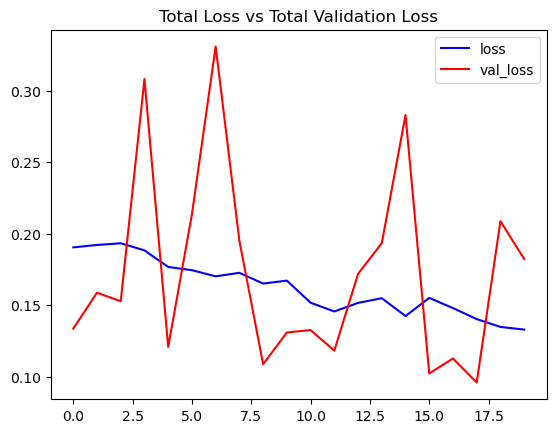

In [28]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]
 
  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
   
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
   
  # Adding title to the plot
  plt.title(str(plot_name))
 
  # Adding legend to the plot
  plt.legend()
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [29]:
from collections import deque

In [30]:
def save_clip(frames):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")  
    frame_rate=30
    output_video = cv2.VideoWriter("/Users/vivek/desktop/Anomaly/Saved/output_clip.mp4", fourcc, frame_rate, (width, height))

    for frame in frames:
        output_video.write(frame)
    output_video.release()


In [48]:
def predict_on_live_video(video_file_path, output_file_path, window_size):
    frame_count=0
    frames=[]
    predicted_label=4
    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)
 
    # Reading the Video File using the VideoCapture Object
#     video_reader = cv2.VideoCapture(video_file_path)
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))
    while True: 
 
        # Reading The Frame
        status, frame = video_reader.read() 
 
        if not status:
            break
 # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
 
        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
 
        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)
 
        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:
 
            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
 
            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
 
            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_max=np.max(predicted_labels_probabilities_averaged)
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
            print(predicted_max)
            if predicted_max>0.6 and predicted_label<4:
                predicted_label = np.argmax(predicted_labels_probabilities_averaged)
                frame_count=frame_count+1
                if frame_count<450:
                    frames.append(frame)
                else:
                    if len(frames)>100:
                        save_clip(frames)
                    frame_count=0
                    frames=[]
            else:

                predicted_label=4
            # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

           
            # Overlaying Class Name Text Ontop of the Frame
            # cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        print(predicted_class_name)
 
        # Writing The Frame
        video_writer.write(frame)
 
 
        cv2.imshow('Predicted Frames', frame)
 
        key_pressed = cv2.waitKey(10)
 
        if key_pressed == ord('q'):
            break
 
            cv2.destroyAllWindows()
 
     
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()
    output_file_path = "/Users/vivek/desktop/Anomaly/Saved"
# output_file_path = 0
    window_size = 30
    video_file_path = "/Users/vivek/desktop/Anomaly/Anomaly-Videos-Part-1/Arrest/Arrest004_x264.mp4"
    predict_on_live_video(video_file_path, output_file_path, window_size)    


In [49]:


predict_on_live_video(video_file_path, output_file_path, window_size)


1/1 [==============================] - 0s 18ms/step


[ERROR:0@3319.822] global cap.cpp:645 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /Users/vivek/desktop/Anomaly/Saved in function 'icvExtractPattern'




IndexError: list index out of range